In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
from torchvision.transforms.transforms import Normalize

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


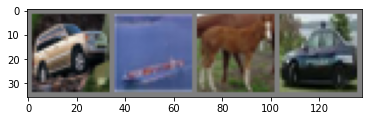

car   ship  horse car  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as f

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
  
  def forward(self, x):
    x = self.pool(f.relu(self.conv1(x)))
    x = self.pool(f.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
for epoch in range(2):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i%2000 == 1999:
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
      running_loss = 0.0

  print('Finished Training')    

[1,  2000] loss: 2.208
[1,  4000] loss: 1.826
[1,  6000] loss: 1.664
[1,  8000] loss: 1.587
[1, 10000] loss: 1.518
[1, 12000] loss: 1.480
Finished Training
[2,  2000] loss: 1.394
[2,  4000] loss: 1.370
[2,  6000] loss: 1.362
[2,  8000] loss: 1.333
[2, 10000] loss: 1.313
[2, 12000] loss: 1.277
Finished Training


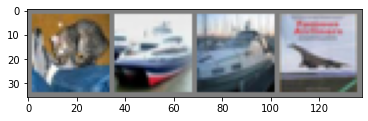

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
outputs = net(images)
outputs

tensor([[-0.5216, -0.9503,  0.7652,  1.9510, -0.9882,  1.0154,  0.2955, -0.7665,
         -0.2306, -0.9800],
        [ 4.9205,  5.2482, -2.1458, -1.7431, -3.9610, -4.7704, -3.7049, -4.6116,
          7.5429,  3.3006],
        [ 2.6770,  2.1953, -0.6134, -0.6891, -1.2919, -2.5160, -2.2302, -2.2293,
          3.9797,  0.8406],
        [ 3.5396,  1.7839, -0.2796, -1.2991, -0.6412, -2.6206, -3.8263, -0.1924,
          3.0476,  1.1145]], grad_fn=<AddmmBackward0>)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' 
                              for j in range(batch_size)))

Predicted:  cat   ship  ship  plane
